In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [2]:
import sys 
import csv 
import numpy as np
import pandas as pd

In [3]:
housing = pd.read_csv('/Users/han-eunbi/Desktop/UIUC/23Spring/IE517/housing.csv')
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.describe(include='all').round(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000
mean,3.614,11.364,11.137,0.069,0.555,6.285,68.575,3.795,9.549,408.237,18.456,356.674,12.653,22.533
std,8.602,23.322,6.860,0.254,0.116,0.703,28.149,2.106,8.707,168.537,2.165,91.295,7.141,9.197
min,0.006,0.000,0.460,0.000,0.385,3.561,2.900,1.130,1.000,187.000,12.600,0.320,1.730,5.000
25%,0.082,0.000,5.190,0.000,0.449,5.885,45.025,2.100,4.000,279.000,17.400,375.378,6.950,17.025
50%,0.257,0.000,9.690,0.000,0.538,6.208,77.500,3.207,5.000,330.000,19.050,391.440,11.360,21.200
75%,3.677,12.500,18.100,0.000,0.624,6.624,94.075,5.188,24.000,666.000,20.200,396.225,16.955,25.000
max,88.976,100.000,27.740,1.000,0.871,8.780,100.000,12.126,24.000,711.000,22.000,396.900,37.970,50.000


/Users/han-eunbi/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


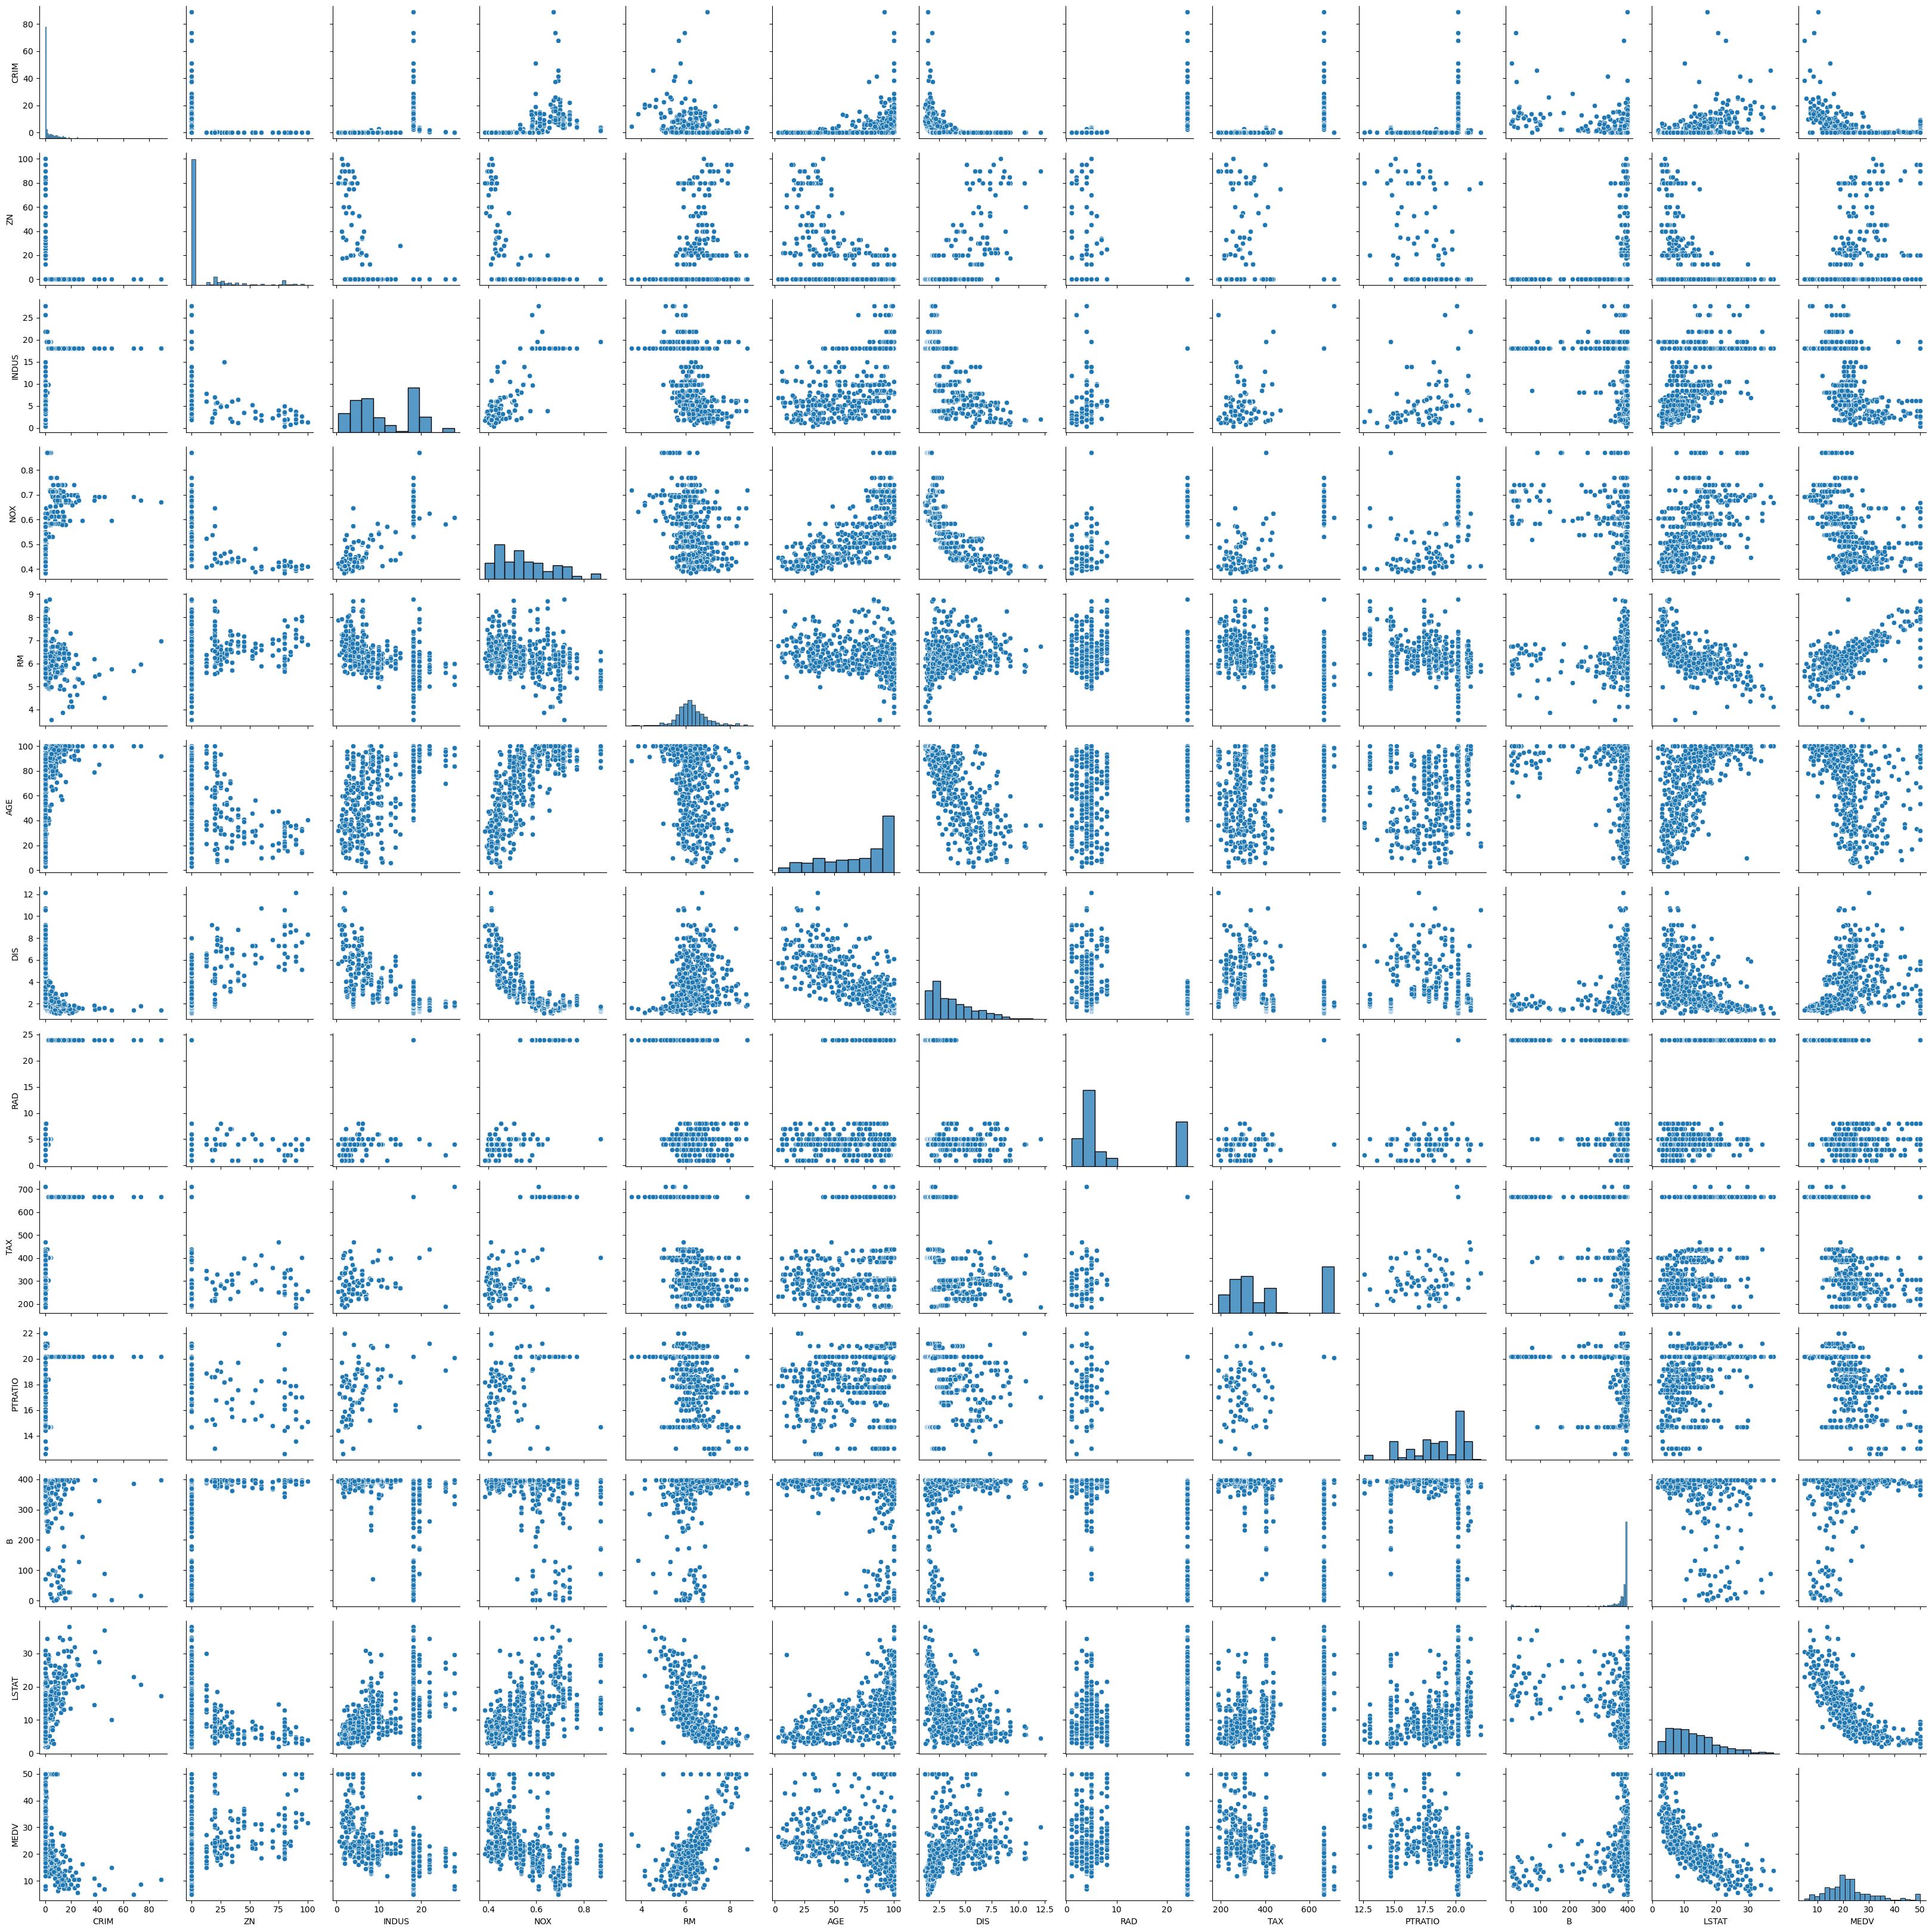

In [5]:
# drop CHAS
cols = housing.drop(['CHAS'],axis=1).columns.values
sns.pairplot(housing[cols],size=2.5)
plt.tight_layout()
plt.show()

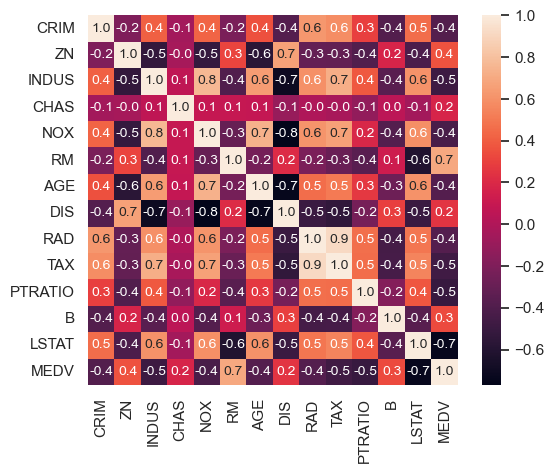

In [6]:
# pearson r
cols = housing.columns.values
cm = np.corrcoef(housing[cols].values.T)
sns.set(font_scale=1.0)
hm=sns.heatmap(cm,cbar=True, annot=True,square=True,fmt='.1f',annot_kws={'size':10},xticklabels=cols,yticklabels=cols)
plt.show()


In [7]:
# prepare data
X = housing.drop(['MEDV'],axis=1).values
y = housing['MEDV'].values
x_train,x_test, y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [8]:
# Robust Scaler
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()
robust_scaler.fit(x_train)
x_train_scaled = robust_scaler.transform(x_train)
x_test_scaled = robust_scaler.transform(x_test)

In [9]:
# Also used Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

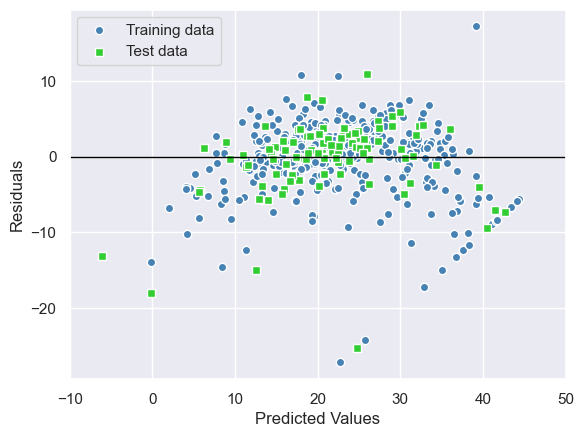

In [10]:
reg = LinearRegression()

reg.fit(X_train,y_train)
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

plt.scatter(y_train_pred,y_train_pred-y_train,c='steelblue',marker='o',edgecolor='white',label='Training data')
plt.scatter(y_test_pred,y_test_pred-y_test,c='limegreen',marker='s',edgecolor='white',label='Test data')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0,xmin=-10,xmax=50,color='black',lw=1)
plt.xlim([-10,50])
plt.show()

In [11]:
print('Coefficient:\n',reg.coef_)
print('Intercept: \n',reg.intercept_)
print('MSE train: %.3f, test: % .3f'%(mean_squared_error(y_train,y_train_pred),mean_squared_error(y_test,y_test_pred)))
print('R^2 train: % .3f, test: % .3f' %(r2_score(y_train,y_train_pred),r2_score(y_test,y_test_pred)))


Coefficient:
 [-1.00213533  0.69626862  0.27806485  0.7187384  -2.0223194   3.14523956
 -0.17604788 -3.0819076   2.25140666 -1.76701378 -2.03775151  1.12956831
 -3.61165842]
Intercept: 
 22.796534653465375
MSE train: 21.641, test:  24.291
R^2 train:  0.751, test:  0.669


### Tried to figure out which performs better between scaled data and raw data 
- Results : There was no big difference. So, I used raw data to Ridge, Lasso Model


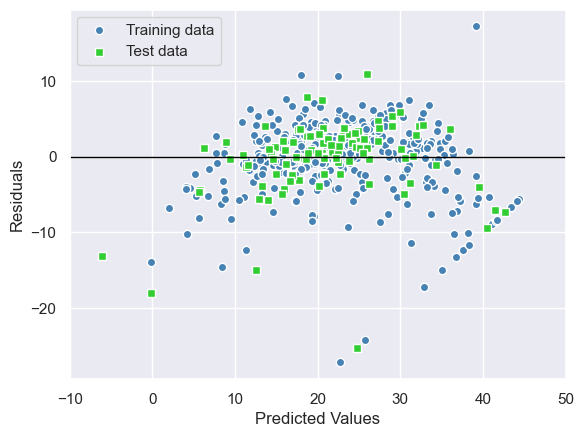

In [12]:
reg = LinearRegression()

reg.fit(x_train,y_train)
y_train_pred = reg.predict(x_train)
y_test_pred = reg.predict(x_test)

plt.scatter(y_train_pred,y_train_pred-y_train,c='steelblue',marker='o',edgecolor='white',label='Training data')
plt.scatter(y_test_pred,y_test_pred-y_test,c='limegreen',marker='s',edgecolor='white',label='Test data')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0,xmin=-10,xmax=50,color='black',lw=1)
plt.xlim([-10,50])
plt.show()

In [13]:
print('Coefficient:\n',reg.coef_)
print('Intercept: \n',reg.intercept_)
print('MSE train: %.3f, test: % .3f'%(mean_squared_error(y_train,y_train_pred),mean_squared_error(y_test,y_test_pred)))
print('R^2 train: % .3f, test: % .3f' %(r2_score(y_train,y_train_pred),r2_score(y_test,y_test_pred)))


Coefficient:
 [-1.13055924e-01  3.01104641e-02  4.03807204e-02  2.78443820e+00
 -1.72026334e+01  4.43883520e+00 -6.29636221e-03 -1.44786537e+00
  2.62429736e-01 -1.06467863e-02 -9.15456240e-01  1.23513347e-02
 -5.08571424e-01]
Intercept: 
 30.246750993923925
MSE train: 21.641, test:  24.291
R^2 train:  0.751, test:  0.669


## Ridge Model 

- Use GridSearch for finding alpha ( hyper parameter tuning )

In [14]:
from scipy.stats import uniform 
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'alpha': uniform()}

model = Ridge()
rand_search = RandomizedSearchCV(estimator=model, 
                                 param_distributions=param_grid,
                                 n_iter=100)

rand_search.fit(x_train, y_train)

print(rand_search.best_estimator_.alpha)
print(rand_search.best_score_)


0.004626932663316152
0.7244233736657961


In [15]:
a = rand_search.best_estimator_.alpha

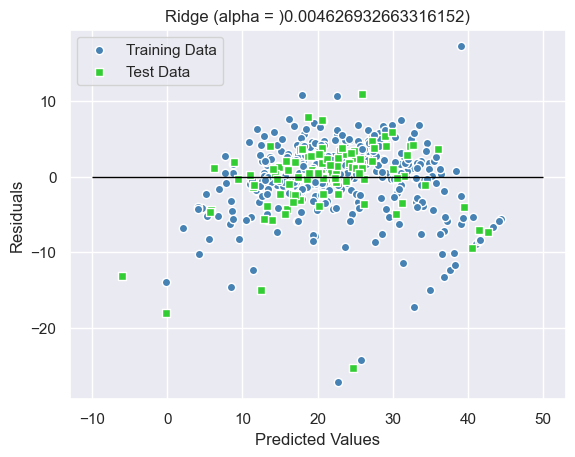

Ridge alpha =  0.004626932663316152
Coefficient:
 [-1.13023146e-01  3.01277769e-02  4.01076041e-02  2.78277158e+00
 -1.71389909e+01  4.43919513e+00 -6.34670685e-03 -1.44695598e+00
  2.62310199e-01 -1.06534056e-02 -9.14723950e-01  1.23537850e-02
 -5.08686339e-01]
Intercept:
 30.20278828585896
MSE train: 21.641, test: 24.291
R^2 train: 0.751, test: 0.669


In [16]:
ridge = Ridge(alpha=a)
ridge.fit(x_train,y_train)
y_train_pred = ridge.predict(x_train)
y_test_pred = ridge.predict(x_test)
plt.scatter(y_train_pred,y_train_pred-y_train,c='steelblue',marker='o',edgecolor='white',label='Training Data')
plt.scatter(y_test_pred,y_test_pred-y_test,c='limegreen',marker='s',edgecolor='white',label='Test Data')
plt.title('Ridge (alpha = )'+str(a)+')')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc='upper left')
plt.hlines(y=0,xmin=-10,xmax=50,color='black',lw=1)
plt.show()
print("Ridge alpha = ",a)
print('Coefficient:\n',ridge.coef_)
print('Intercept:\n',ridge.intercept_)
print('MSE train: %.3f, test: %.3f'%(mean_squared_error(y_train,y_train_pred),mean_squared_error(y_test,y_test_pred)))
print('R^2 train: %.3f, test: %.3f'%(r2_score(y_train,y_train_pred),r2_score(y_test,y_test_pred)))


## Lasso Model

- Use GridSearch for finding alpha ( hyper parameter tuning )

In [17]:
model = Lasso()
rand_search = RandomizedSearchCV(estimator=model, 
                                 param_distributions=param_grid,
                                 n_iter=100)

rand_search.fit(x_train, y_train)

print(rand_search.best_estimator_.alpha)
print(rand_search.best_score_)


0.0029905026342946783
0.7242253411588278


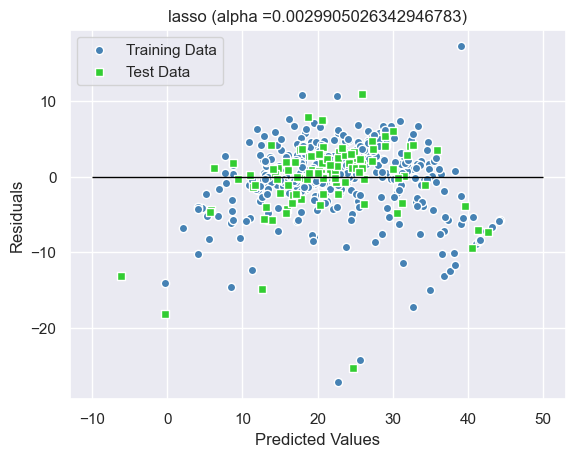

Ridge alpha= 0.0029905026342946783
Coefficient:
 [-1.12534007e-01  3.03646826e-02  3.60994600e-02  2.72053910e+00
 -1.61967629e+01  4.43868406e+00 -6.95391867e-03 -1.43236117e+00
  2.60620854e-01 -1.07513430e-02 -9.04204887e-01  1.23910659e-02
 -5.10980691e-01]
Intercept: 
 29.589704031736446
MSE train: 21.645, test:  24.287
R^2 train:  0.751, test:  0.669


In [18]:
a = rand_search.best_estimator_.alpha
lasso = Lasso(alpha = a)
lasso.fit(x_train,y_train)
y_train_pred = lasso.predict(x_train)
y_test_pred = lasso.predict(x_test)
plt.scatter(y_train_pred,y_train_pred-y_train,c='steelblue',marker='o',edgecolor='white',label='Training Data')
plt.scatter(y_test_pred,y_test_pred-y_test,c='limegreen',marker='s',edgecolor='white',label='Test Data')
#title = 'lasso (alpha ='+ str(a) +')'
plt.title('lasso (alpha ='+ str(a) +')')
plt.xlabel("Predicted Values")
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0,xmin=-10,xmax=50,color='black',lw=1)
plt.show()
print('Ridge alpha=', a)
print('Coefficient:\n', lasso.coef_)
print('Intercept: \n', lasso.intercept_)
print('MSE train: %.3f, test: % .3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))
print('R^2 train: % .3f, test: % .3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))



In [19]:
print("My name is Eunbi Han")
print("My NetID is eunbih2")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation")

My name is Eunbi Han
My NetID is eunbih2
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation
